In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/2010-2011 Solar home electricity data(Preprocessed).csv')

In [3]:
df.head()

,date,Customer,Postcode,Generator Capacity,Consumption Category,Load(kWh)
0,2010-07-01 00:30:00,1.0,2076.0,3.78,CL,1.250
1,2010-07-01 01:00:00,1.0,2076.0,3.78,CL,1.244
2,2010-07-01 01:30:00,1.0,2076.0,3.78,CL,1.256
3,2010-07-01 02:00:00,1.0,2076.0,3.78,CL,0.744
4,2010-07-01 02:30:00,1.0,2076.0,3.78,CL,0.019


In [36]:
df.tail()

,date,Customer,Postcode,Generator Capacity,Consumption Category,Load(kWh)
12947275,2011-06-30 22:00:00,300.0,2086.0,3.36,GG,0.0
12947276,2011-06-30 22:30:00,300.0,2086.0,3.36,GG,0.0
12947277,2011-06-30 23:00:00,300.0,2086.0,3.36,GG,0.0
12947278,2011-06-30 23:30:00,300.0,2086.0,3.36,GG,0.0
12947279,2011-07-01 00:00:00,300.0,2086.0,3.36,GG,0.0


In [90]:
df['Consumption Category'].value_counts()

GC    5256000
GG    5256000
CL    2435280
Name: Consumption Category, dtype: int64

In [91]:
GCC = df['Consumption Category'].value_counts()[0]/300
GGC = df['Consumption Category'].value_counts()[1]/300
CLC = df['Consumption Category'].value_counts()[2]/139

In [84]:
label = np.unique(df['Consumption Category'])
index = np.arange(len(label))

plt.bar(index, tips_sum_by_day)plt.title('Sum of Tips by Day', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Sum of Tips', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

0           CL
1           CL
2           CL
3           CL
4           CL
            ..
12947275    GG
12947276    GG
12947277    GG
12947278    GG
12947279    GG
Name: Consumption Category, Length: 12947280, dtype: object

In [65]:
customer = np.unique(df[df['Consumption Category']=="CL"]['Customer'])
customer

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  14.,
        15.,  18.,  19.,  23.,  27.,  29.,  30.,  35.,  36.,  37.,  39.,
        41.,  42.,  43.,  49.,  51.,  53.,  54.,  56.,  59.,  61.,  64.,
        65.,  66.,  68.,  69.,  70.,  71.,  73.,  75.,  77.,  81.,  84.,
        87.,  88.,  94.,  95.,  96.,  98.,  99., 105., 107., 108., 110.,
       112., 118., 119., 122., 123., 125., 126., 127., 129., 133., 137.,
       140., 145., 146., 148., 150., 151., 154., 155., 156., 158., 160.,
       161., 163., 167., 168., 171., 173., 174., 178., 184., 186., 187.,
       193., 194., 196., 202., 204., 206., 208., 209., 210., 212., 215.,
       217., 219., 221., 223., 225., 226., 227., 232., 234., 235., 239.,
       241., 243., 245., 246., 247., 248., 249., 252., 259., 261., 264.,
       270., 271., 272., 274., 277., 279., 281., 283., 284., 285., 286.,
       287., 289., 290., 293., 294., 297., 300.])

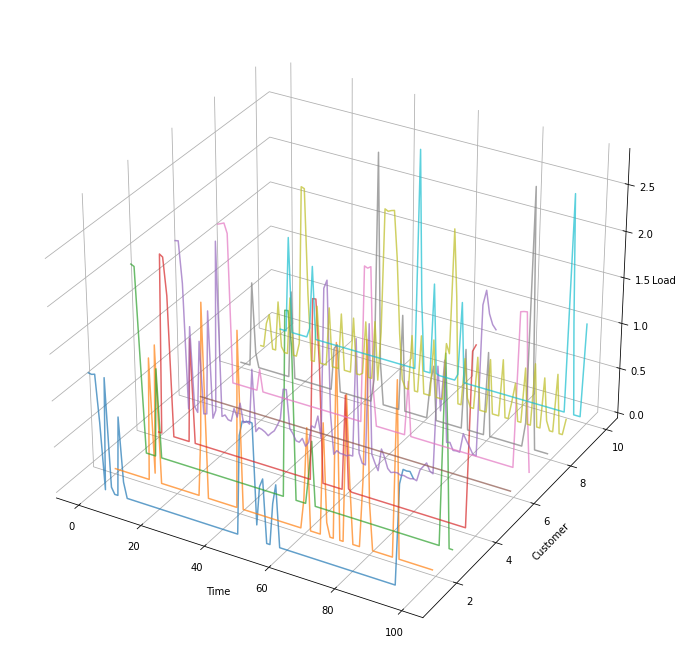

In [81]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    c1 = df[(df['Customer']==customer[i]) & (df['Consumption Category']=="CL")]['Load(kWh)']
    x = np.arange(100)
    y = c1.iloc[0:100]
    z = np.ones(100) + i
    ax.plot(x,z,y, alpha=0.7)
ax.set_xlabel('Time')
ax.set_ylabel('Customer')
ax.set_zlabel('Load')

# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.show()

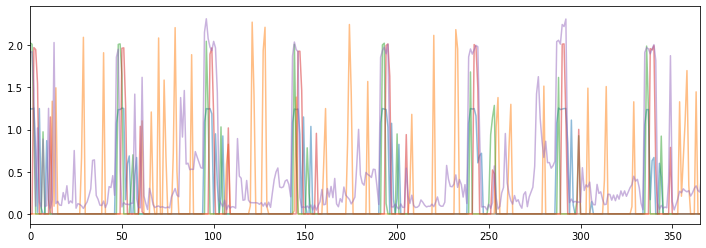

In [83]:
plt.figure(figsize=(12,4))
for i in range(5):
    c1 = df[(df['Customer']==customer[i]) & (df['Consumption Category']=="CL")]['Load(kWh)'].reset_index(drop=True)
    plt.plot(c1, alpha=0.5)
plt.xlim([0,365])    
plt.show()

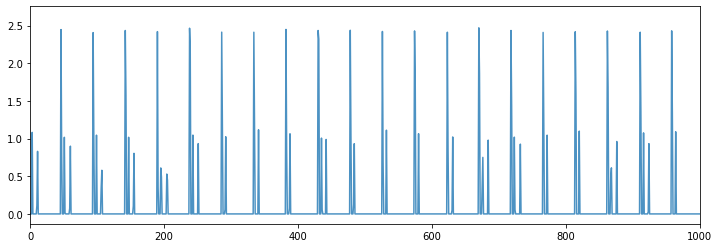

In [75]:
plt.figure(figsize=(12,4))
c1 = df[(df['Customer']==customer[i]) & (df['Consumption Category']=="CL")]['Load(kWh)'].reset_index(drop=True)
plt.plot(c1, alpha=0.8)
plt.xlim([0,1000])    
plt.show()

In [ ]:
# 30분 단위를 -> 하루 단위로 예측